<a href="https://colab.research.google.com/github/AlexKressner/ML_Intro/blob/main/Exam_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vorhersage von Prüfungsergebnissen mit ML

In [ ]:
import pandas as pd

## 1 Daten laden

In [ ]:
! git clone https://github.com/AlexKressner/ML_Intro/

fatal: destination path 'ML_Intro' already exists and is not an empty directory.


In [ ]:
data = pd.read_csv("./ML_Intro/StudentPerformanceFactors.csv", sep=";")

## 2 Erster Überblick zum Datensatz

In [ ]:
# Kopfzeile der Daten
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
# Größe des Datensatzes
data.shape

(6607, 20)

# 3 Vorhersage des Prüfungsergebnisses ('Exam_Score')

In [ ]:
# Aufteilen der Daten in Target (y) und Features (X)
y, X = data["Exam_Score"], data.drop(columns="Exam_Score")

In [ ]:
y.head()

,Exam_Score
0,67
1,61
2,74
3,71
4,70


In [ ]:
X.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female


In [ ]:
# One-Hot-Encoding
X = pd.get_dummies(X)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
# Modell instanzieren
model = RandomForestRegressor()

In [ ]:
# Modell trainieren
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
X_test.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_High,...,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male
1476,19,77,6,54,3,2,True,False,False,False,...,True,False,True,False,False,False,True,False,False,True
2611,13,66,6,69,2,4,False,True,False,False,...,True,False,False,True,False,False,False,True,False,True
125,33,70,6,82,1,4,False,False,True,False,...,True,False,True,False,False,False,False,True,False,True
3178,26,64,7,92,2,4,True,False,False,False,...,True,False,True,False,False,False,True,False,True,False
2143,21,62,7,94,1,3,False,False,True,False,...,True,False,True,False,False,False,True,False,True,False


In [ ]:
# Modell anwenden
y_pred = model.predict(X_test)
y_pred[:10]

array([65.8 , 61.24, 68.99, 66.62, 63.99, 68.03, 71.18, 67.88, 69.61,
       76.32])

# 4. Modell evaluieren

In [ ]:
import sklearn.metrics
import matplotlib.pyplot as plt

In [ ]:
# mittlerer absoluter Fehler
sklearn.metrics.mean_absolute_error(y_test, y_pred)

1.205998487140696

In [ ]:
# mittlerer prozentualer Fehler
sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred)*100

1.7026461397911867

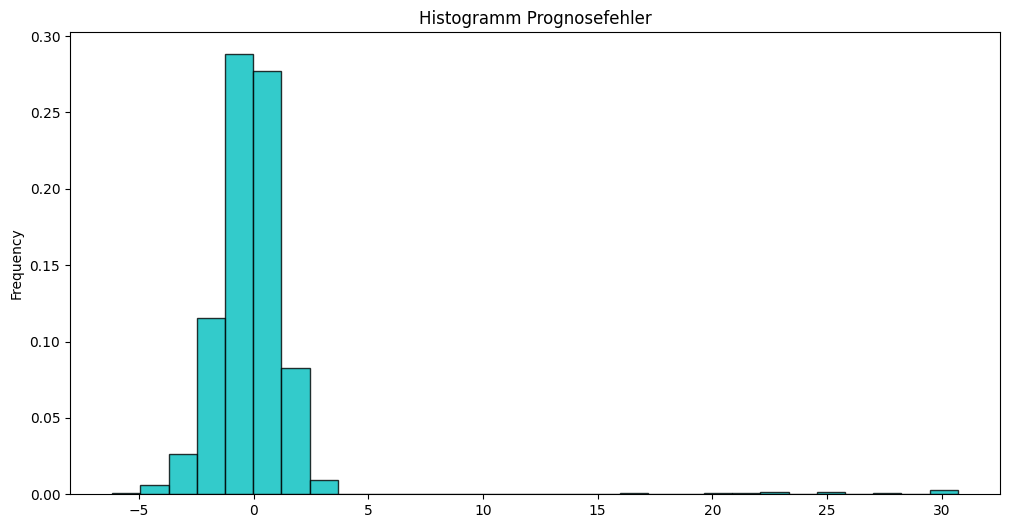

In [ ]:
(y_test - y_pred).plot(
    kind="hist",
    title= "Histogramm Prognosefehler",
    figsize=(12,6),
    color="c",
    edgecolor='k',
    density=True,
    alpha=0.8,
    bins=30
    )
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    model, X_test, y_test, n_repeats=5, random_state=42, n_jobs=2
)
forest_importances = pd.Series(result.importances_mean, index=X_test.columns)

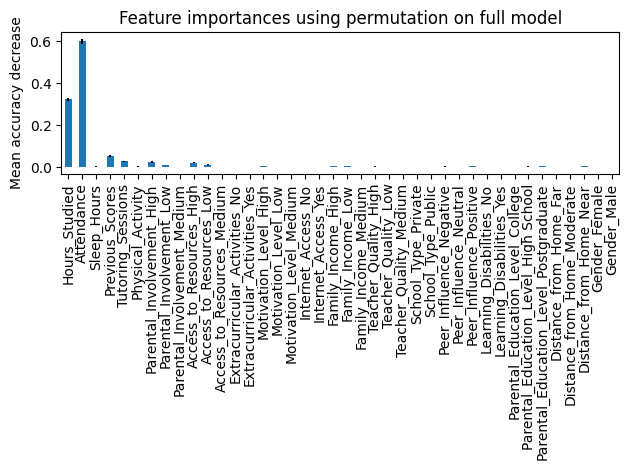

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()